In [ ]:
#image classification model using CNN on fashion MNIST dataset

In [ ]:
# Importing Packages
import numpy as np
from matplotlib import pyplot
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, y_train.shape, "____" , X_test.shape, y_test.shape
((60000, 28, 28), (60000,), '____', (10000, 28, 28), (10000,))
X_train[0]

4422102/4422102 [==============================] - 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
class_labels = ["Trouser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker",]
class_labels

['Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker']

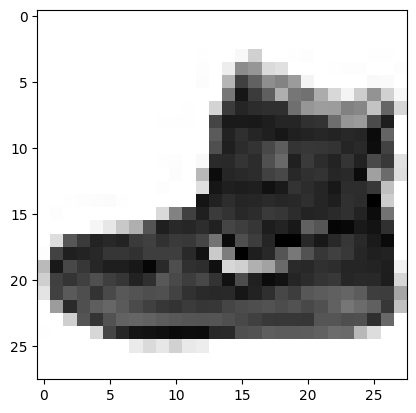

In [ ]:
plt.imshow(X_train[0] , cmap="Greys")

In [ ]:
X_train. shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train =X_train/255
X_test = X_test/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train)

In [ ]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((45000, 28, 28, 1), (45000,), (15000, 28, 28, 1), (15000,))

In [ ]:
cnn = keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=20 , batch_size=16 , verbose=1 , validation_data=(X_validation, y_validation))

Epoch 1/20
2813/2813 [==============================] - 29s 5ms/step - loss: 0.5925 - accuracy: 0.7756 - val_loss: 0.3865 - val_accuracy: 0.8568
Epoch 2/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.3886 - accuracy: 0.8586 - val_loss: 0.3533 - val_accuracy: 0.8713
Epoch 3/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.3407 - accuracy: 0.8755 - val_loss: 0.3128 - val_accuracy: 0.8829
Epoch 4/20
2813/2813 [==============================] - 15s 5ms/step - loss: 0.3085 - accuracy: 0.8858 - val_loss: 0.2921 - val_accuracy: 0.8935
Epoch 5/20
2813/2813 [==============================] - 15s 5ms/step - loss: 0.2861 - accuracy: 0.8941 - val_loss: 0.2902 - val_accuracy: 0.8940
Epoch 6/20
2813/2813 [==============================] - 15s 5ms/step - loss: 0.2694 - accuracy: 0.9001 - val_loss: 0.2779 - val_accuracy: 0.8975
Epoch 7/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.2560 - accuracy: 0.9058 - val_loss: 0.2739 - val_ac

In [ ]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3073 - accuracy: 0.9046


[0.3072705566883087, 0.9046000242233276]

Text(0.5, 1.0, 'Shirt / 5')

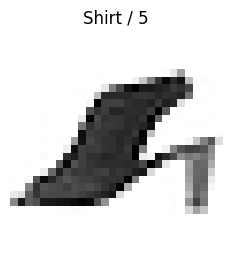

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
 plt.subplot(5,5,j)
j+=1
plt.imshow(X_train[i],cmap="Greys")
plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))